# Lab 5a - Image Augmentation

Data augmentation is the name for the collection of techniques used to increase the amount of usable data. In computer vision this usually means applying various spatial and colour transformations to images. In this notebook we'll explore some image augmentation techniques and see how they can boost training performance.

The augmentation techniques we'll see today are all provided in the `torchvision.transforms` module.

## Transforms Demonstration

Before applying these to a dataset to see the impacts on training performance, we'll play with some of the augmentation methods that PyTorch provides in order to visually observe their effects.

We'll first download a sample image from the internet, so run the next cell to do so.

In [ ]:
!wget -q -O sample.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Vegetables-1212845.jpg/800px-Vegetables-1212845.jpg

The standard way of handling images in Python is using the Python Imaging Library (PIL) Image class, and is what PyTorch transformations expect as input. Run the next cell to load the image from disk and display it.

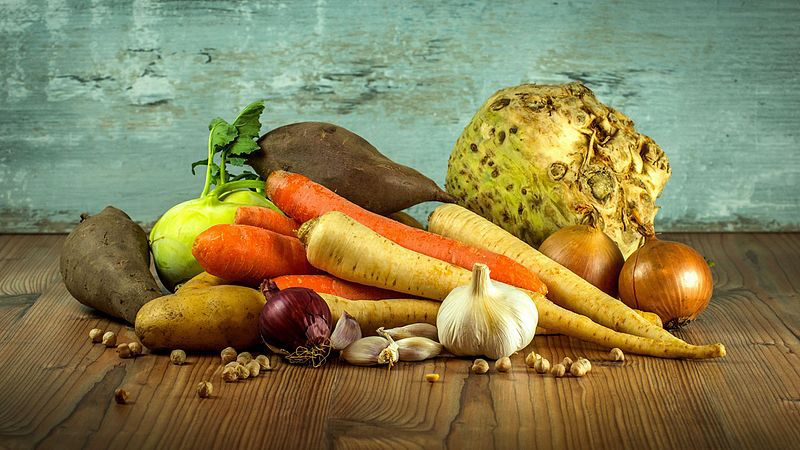

In [ ]:
import numpy as np
from PIL import Image
# Read the image from disk
image = Image.open('sample.jpg')

# Display the image without any modifications
display(image)

Before seeing the transforms in action, just a little overview on how PyTorch transforms work.

Transforms are classes - not functions - and as such, need to be instantiated in order to use them. For this reason, you'll see usage like this:

```python
resize_transform = transforms.Resize(64)
my_resized_image = resize_transform(my_image)
```

So keep this in mind while using them, as you don't want to accidentally pass an image to the constructor!

### Deterministic Transforms

Although they're not divided in this way in the documentation, we'll separate the transforms into two categories:
 * Deterministic - produces outputs without any element of randomness. These *mostly* don't perform data augmentation, as each image maps to the same output every time*.
 * Non-deterministic - produces randomly modified outputs. These transforms perform data augmentation, as each image maps to a randomly modified output every time.

The [`torchvision.transforms` documentation](https://pytorch.org/vision/stable/transforms.html) is quite good, so we'll go through examples of what each transform does, but won't spend too long describing their interfaces - that's what the documentation is for! We won't try out all of the different options for the transforms as it would take all day, but you should definitely explore them after you've finished the lab.

#### Resize 

[transforms.Resize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize) resizes the input image to the given size. If only a single number is provided for the size parameter, the aspect-ratio of the image will be kept and the shortest dimension will be this length.

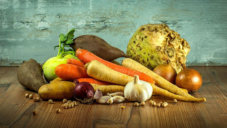

(227, 128)


In [ ]:
import torchvision.transforms as transforms

# Initialise the transform
resize_transform = transforms.Resize(128)
# Apply it
resized_image = resize_transform(image)

# Display the result
display(resized_image)

print(resized_image.size)

Pretty simple to use, right?

As our original image was quite large, we'll actually use this resized image instead for the rest of the demonstration.

In [ ]:
image = resized_image

#### CenterCrop 

[transforms.CenterCrop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.CenterCrop) takes a crop from the centre of the image. As most neural networks require a fixed size input, you'll typically see that the input image is first resized to approximately the correct size, then a crop is taken from the centre to get the exact dimensions required.

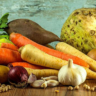

In [ ]:
crop_transform = transforms.CenterCrop(96)
display(crop_transform(image))

#### FiveCrop 

[transforms.FiveCrop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.FiveCrop) takes five crops from the image - one in the centre and one in each corner. This transform is a form of augmentation as for each image, five outputs are produced - effectively increasing the number of examples in the dataset by a factor of five.

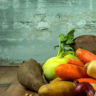

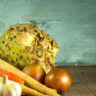

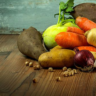

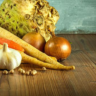

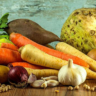

In [ ]:
five_crop_transform = transforms.FiveCrop(96)

for img in five_crop_transform(image):
    display(img)

#### TenCrop 

[transforms.TenCrop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.TenCrop) does the same thing as `FiveCrop`, but additionally returns the horizontally flipped versions of the images as well.

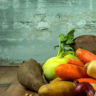

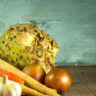

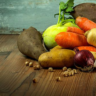

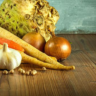

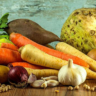

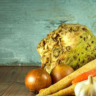

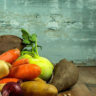

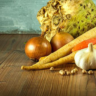

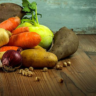

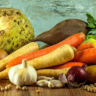

In [ ]:
ten_crop_transform = transforms.TenCrop(96)

for img in ten_crop_transform(image):
    display(img)

#### Pad 
[transforms.Pad](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Pad) pads around the image with a given value - effectively building a frame around the image. The provided argument is the number of pixels to pad around each edge of the image. There are a few different modes of padding, some of which are demonstrated below.

original image size:  (227, 128)




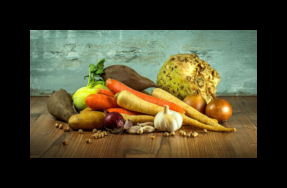

image size:  (287, 188)




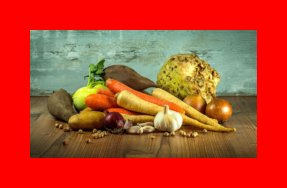

image size:  (287, 188)




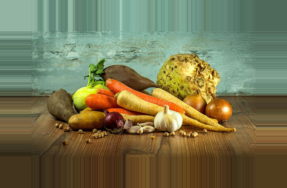

image size:  (287, 188)




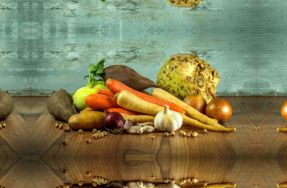

image size:  (287, 188)




In [ ]:
# The default method - pad with zeros
print("original image size: ",image.size )
print("\n")

pad_transform = transforms.Pad(30)
display(pad_transform(image))
print("image size: ", pad_transform(image).size)
print("\n")

# Pad with a specific colour (red, in this case)
pad_transform = transforms.Pad(30, fill=(255, 0, 0))
display(pad_transform(image))
print("image size: ", pad_transform(image).size)
print("\n")

# Pad by repeating the pixels along each edge
pad_transform = transforms.Pad(30, padding_mode='edge')
display(pad_transform(image))
print("image size: ", pad_transform(image).size)
print("\n")

# Pad by mirroring the edges of the image
pad_transform = transforms.Pad(30, padding_mode='reflect')
display(pad_transform(image))
print("image size: ", pad_transform(image).size)
print("\n")

#### Grayscale 

[transforms.Grayscale](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Grayscale) converts a coloured RGB image into a grayscale image. The argument specifies whether the output image should have either a single colour channel or three (RGB) channels each with matching values.

Although the images in the next cell look the same, their shapes will be:
`[128, 227, 1]` and `[128, 227, 3]`.

Original image channels:  RGB




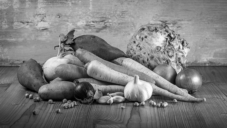

Grayscale image channels:  L




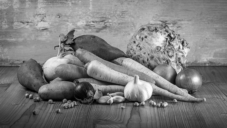

Grayscale image channels:  RGB




In [ ]:
print("Original image channels: ", image.mode)
print("\n")
gray_transform = transforms.Grayscale(1)
display(gray_transform(image))
print("Grayscale image channels: ", gray_transform(image).mode)
print("\n")

gray_transform = transforms.Grayscale(3)
display(gray_transform(image))
print("Grayscale image channels: ", gray_transform(image).mode)
print("\n")

#### ToTensor 

[transforms.ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) converts a PIL image into a PyTorch tensor. This is useful for two reasons:
 1. Neural networks require that their inputs be tensors, thus the final output of our transforms should be a tensor.
 2. Some transforms (as we'll see in a moment) only operate on tensors, not PIL images.

In [ ]:
to_tensor_transform = transforms.ToTensor()
tensor_img = to_tensor_transform(image)

print(type(image))
print(type(tensor_img))

<class 'PIL.Image.Image'>
<class 'torch.Tensor'>


#### ToPILImage 

[transforms.ToPILImage](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToPILImage) does the opposite of `ToTensor`, it takes as input either a PyTorch tensor or a numpy ndarray and converts it to a PIL Image. This comes in handy at various times.

In [ ]:
to_pil_transform = transforms.ToPILImage()

print(type(tensor_img))
print(type(to_pil_transform(tensor_img)))

<class 'torch.Tensor'>
<class 'PIL.Image.Image'>


#### Normalize 

[transforms.Normalize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize) normalises an image such that it has a mean of `0` and a standard-deviation of `1`, using the provided mean and standard deviation, which helps stabilise the training of neural networks. The typical use is to compute the mean and standard deviation of the training dataset, then apply this to all input image.

_This requires a torch tensor as input._

In [ ]:
import torch
mean, std = torch.mean(tensor_img), torch.std(tensor_img)
print("Before:", mean, std)

norm_transform = transforms.Normalize(mean, std)
normalised_img = norm_transform(tensor_img)

mean, std = torch.mean(normalised_img), torch.std(normalised_img)
print("After:", mean, std)

Before: tensor(0.4501) tensor(0.2205)
After: tensor(3.6761e-09) tensor(1.)


### Non-Deterministic Transforms

The following transforms each have some element of randomness, so may produce a different result each time they're run. To observe the effects of these transforms, you may need to run the cell multiple times.

#### RandomGrayscale 

[transforms.RandomGrayscale](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomGrayscale) randomly converts a colour image to grayscale with the provided probability. As this is a probabilistic transformation, you may need to run the cell multiple times to observe its effects.

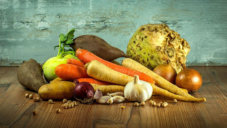

In [ ]:
grayscale_transform = transforms.RandomGrayscale(0.5)
display(grayscale_transform(image))

#### RandomCrop 

[transforms.RandomCrop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomCrop) takes a crop of the specified size at a random location in the image. There are various modes available which are similar to those found in `transforms.Pad`, so read the documentation for more information. This is possibly the most frequently augmentation technique used for image classification.

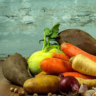

In [ ]:
crop_transform = transforms.RandomCrop(96)
display(crop_transform(image))

#### RandomResizedCrop 

[transforms.RandomResizedCrop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomResizedCrop) randomly resizes and crops the image. The only required argument is the size of the final crop, but there are other optional arguments to specify the scale, aspect ratio and interpolation mode for the image.

Run the following cell a few times to observe its effects.

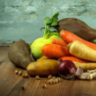

In [ ]:
resized_crop_transform = transforms.RandomResizedCrop(96)
display(resized_crop_transform(image))

#### RandomHorizontalFlip 

[transforms.RandomHorizontalFlip](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomHorizontalFlip) does just as the name suggests - randomly left-right flips the image with the given probability.

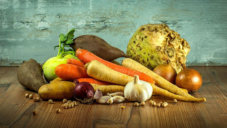

In [ ]:
horiz_flip_transform = transforms.RandomHorizontalFlip(0.5)
display(horiz_flip_transform(image))

#### RandomVerticalFlip

[transforms.RandomVerticalFlip](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomVerticalFlip) randomly flips images vertically. This is less commonly used than horizontal flips, as it doesn't really preserve the natural features of the image.

For example a neural network that detects a person irrespective if he or she is facing left or right is useful, however, training a network to also detect upside-down people is a waste of computation and will likely hurt the model's performance. That being said, there are many cases where vertical flips are reasonable. For example cell classification, since cells can be in any orientation.

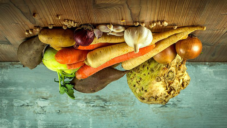

In [ ]:
vert_flip_transform = transforms.RandomVerticalFlip(0.5)
display(vert_flip_transform(image))

#### RandomRotation 

[transforms.RandomRotation](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomRotation) randomly rotates the image by the given angle (in degrees). There are a number of different arguments available, but we'll use it in the most simple way - randomly rotate the image left or right by up to the given angle.

Care should be taken when selecting the rotation angle here for the same reason as for vertical flipping - it might make sense to rotate a picture of a flower by 90 degrees, but rotating a car by 90 degrees would result in it standing on one end! For this reason angles are usually quite conservative at 30 degrees or less.

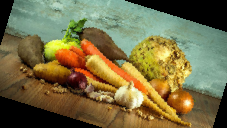

In [ ]:
rotation_transform = transforms.RandomRotation(30)
display(rotation_transform(image))

#### RandomPerspective 

[transforms.RandomPerspective](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomPerspective) randomly applies a perspective transformation to the image, as though the image is a plane that has been rotated in 3D space. Try it out in the following cell for a better understanding.

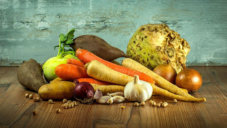

In [ ]:
perspective_transform = transforms.RandomPerspective()
display(perspective_transform(image))

#### RandomAffine 

[transforms.RandomAffine](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomAffine) applies a random affine transformation to the image with the given parameters. This is a combination of rotation, scale, translation, and shearing. Change a few of the parameters below to get an understanding of what these terms mean.

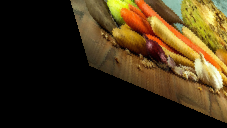

In [ ]:
affine_transform = transforms.RandomAffine(degrees=30,
                                           translate=(.5, .5),
                                           scale=(0.75, 1.25),
                                           shear=45)
display(affine_transform(image))

#### ColorJitter 

[transforms.ColorJitter](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ColorJitter) applies random modifications to the brightness, contrast, saturation and hue of the image. This is very common in computer vision tasks, but care needs to be taken - is it reasonable to expect a tomato classifier to function correctly if the tomatos take on random colours in training dataset?

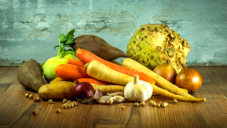

In [ ]:
colour_transform = transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.2, hue=0.05)
display(colour_transform(image))

#### RandomErasing 

[transforms.RandomErasing](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomErasing) randomly replaces rectangular regions of the input image with either randomly generated pixels or a solid colour. There are parameters to control the size and probability of erasing, and requires a tensor as input.

This technique has proven useful in helping neural networks generalise to unseen images, but needs to be used with care as it's possible to erase image features that are important.

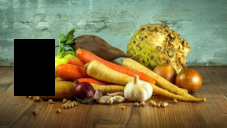

In [ ]:
erase_transform = transforms.RandomErasing()
erased_img = erase_transform(tensor_img)

# We need to convert it back to a PIL Image to display it
display(to_pil_transform(erased_img))

### Utility Transforms

The following transforms are utilites that help with using multiple transforms in different ways. You'll be familiar with the first in the list - `Compose`.

#### Compose

[transforms.Compose](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Compose) applies all of the given transforms in sequence, passing the outputs of one as inputs to the next.

You just need to keep in mind which transforms require PIL Images or PyTorch tensors and place the necessary conversion transforms in between. As transforms are usually for producing inputs for a neural network, you usually want the output of a `Compose` to be a PyTorch tensor.

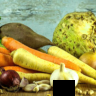

In [ ]:
composed_transforms = transforms.Compose([
    crop_transform,
    colour_transform,
    to_tensor_transform,
    erase_transform,
    to_pil_transform,
])
display(composed_transforms(image))

#### Lambda 

[transforms.Lambda](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Lambda) allows you to write a custom transformation by providing your own function. In the below example we have written a custom transform which sets all pixel values less than `127` to `0`.

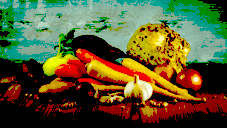

In [ ]:
def threshold_image(img):
    return img.point(lambda pix_val: pix_val if pix_val > 127 else 0) 

threshold_transform = transforms.Lambda(threshold_image)
display(threshold_transform(image))

#### RandomApply 

[transforms.RandomApply](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomApply) applies the provided list of transforms with a given probability, or doesn't apply them at all.

Using the same transforms as with our `Compose` example, we can see that 50% of the time the image is untouched.

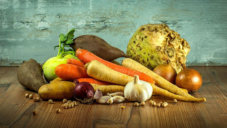

In [ ]:
rand_applied_transforms = transforms.RandomApply([
    crop_transform,
    colour_transform,
    to_tensor_transform,
    erase_transform,
    to_pil_transform,
], 0.5)

display(rand_applied_transforms(image))

#### RandomChoice 

[transforms.RandomChoice](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomChoice) randomly applies a single transform from a list of transforms. In the following example we randomly rotate the image or flip it vertically, with a 50% probability of either.

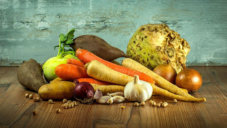

In [ ]:
rand_chosen_transforms = transforms.RandomChoice([
    rotation_transform,
    vert_flip_transform,
])

display(rand_chosen_transforms(image))

#### RandomOrder 

[transforms.RandomOrder](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomOrder) applies all of the provided transforms in a random order. There are some combinations of transforms where order doesn't matter, but for many it does.

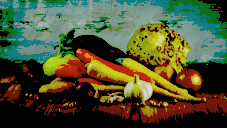

In [ ]:
rand_ordered_transforms = transforms.RandomOrder([
    colour_transform,
    threshold_transform,
])

display(rand_ordered_transforms(image))

## Your turn

<font color='red'>In the next cell, `Compose` the below transforms. Use the above examples and the documentation as a reference.</font>
* Resize the image to be 128px along its shortest dimension.
* Randomly jitter the brightess by 0.2, the contrast by 0.1 and the saturation by 0.1.
* Randomly flip the image vertically (we assume that upside-down flowers are okay).
* Randomly flip the image horizontally.
* Apply a random perspective transformation
* Randomly rotate the image by up to 30 degrees in either direction.
* Take a random 96x96 crop.
* Convert the image to a PyTorch tensor.
* Randomly erase a region from the image (note this is a transformation on tensors hence we need to do it after the convert to PyTorch tensor transformation).


In [ ]:
# TODO: Compose the above transforms
# img_transforms = transforms.Compose([ 
  

# SOLUTION LINE
img_transforms = transforms.Compose([
    transforms.Resize(128),
    transforms.ColorJitter(0.2, 0.1, 0.1),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomPerspective(),
    transforms.RandomRotation(30),
    transforms.RandomCrop(96),
    transforms.ToTensor(),
    transforms.RandomErasing(),

])

Run the cell below to see the the data augmentation transforms being applied to our vegetable example

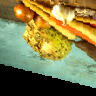

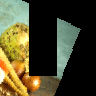

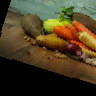

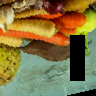

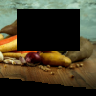

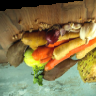

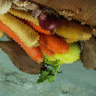

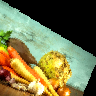

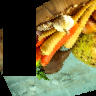

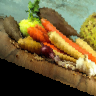

In [ ]:
for _ in range(10):
    display(to_pil_transform(img_transforms(image)))

That is a lot of variations for a single image! 

If you would like you can try some of these data augmentation techniques and how they help improve model test performance give it a try in the lab05b notebook. Although lab05b is focused on transfer learning you can add more data augmentations to see if they help.